In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('Mall_Customers.csv')

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.drop(columns = 'CustomerID', inplace = True)

In [6]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

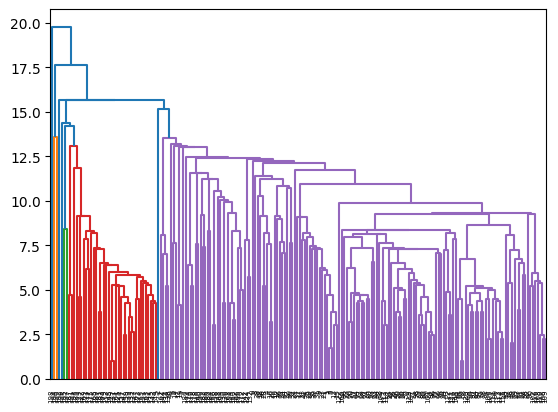

In [7]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(df, method = 'single'))

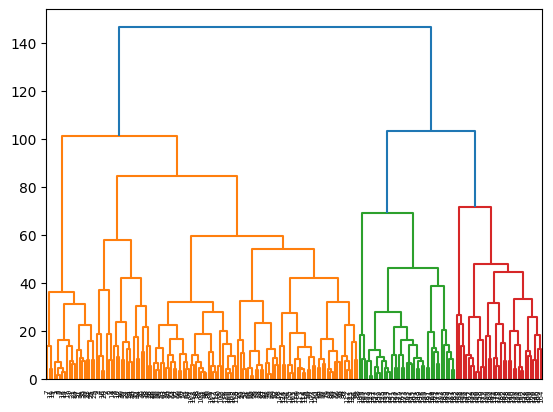

In [8]:
dendrogram = sch.dendrogram(sch.linkage(df, method = 'complete'))

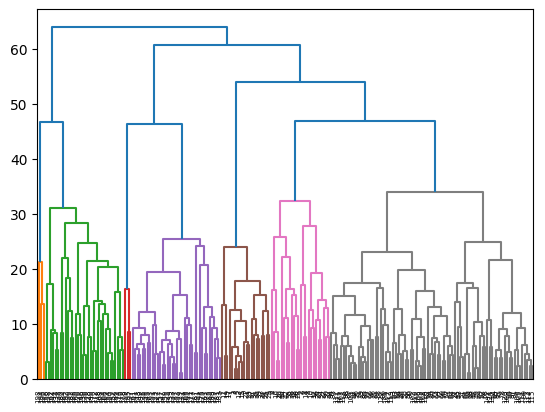

In [9]:
dendrogram = sch.dendrogram(sch.linkage(df, method = 'average'))

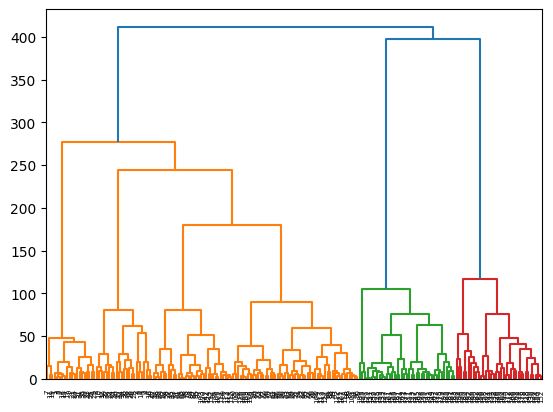

In [10]:
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))

In [16]:
#since two clusters should be as far as possible ,we can say that ward is performing well on this data

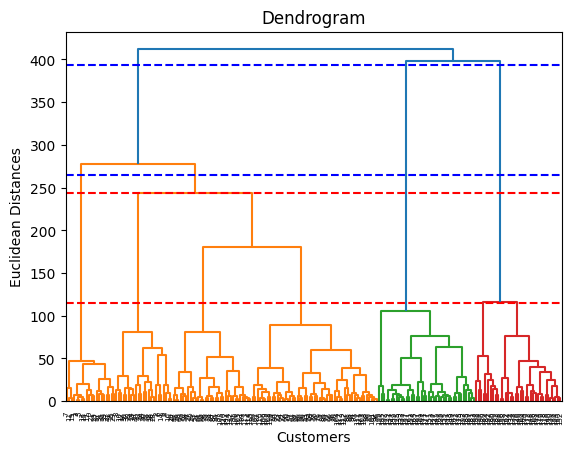

In [11]:
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=394, color='b', linestyle='--')
plt.axhline(y=265, color='b', linestyle='--')
plt.axhline(y=244, color='r', linestyle='--')
plt.axhline(y=115, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [12]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')

y_hc = agg_cluster.fit_predict(df)

In [13]:
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [14]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [17]:
output=pd.DataFrame(y_hc,columns = ['Cluster Number'])

In [18]:
final_data=pd.concat([df, output], axis = 1)

In [19]:
final_data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,1
197,1,32,126,74,2
198,1,32,137,18,1


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [21]:
agg = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)
labels = agg.fit_predict(df_scaled)

In [25]:
from sklearn.metrics import silhouette_score

silhouette_score(df_scaled, labels)


np.float64(0.24834537795671963)

In [24]:
silhouette_score(df,y_hc)

np.float64(0.3812859576468096)

Although the silhouette score was higher without standardization, the clustering was dominated by Annual Income due to scale differences. After standardization, the silhouette score reduced, but the clusters became more meaningful as all features contributed equally. Hence, the standardized model is preferred

In [27]:
df['Cluster'] = labels
df.groupby('Cluster').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.410000,28.700000,60.450000,68.000000
1,0.432836,52.716418,46.671642,40.388060
2,0.545455,41.454545,89.090909,16.181818


Cluster 0 represents young high-spending customers,
Cluster 1 represents older low-spending customers,
Cluster 2 represents high-income but low-spending customers.
These insights can be used for targeted marketing strategies

In [28]:
df_no_gender = df.drop(columns=['Gender'])

Gender was removed because it is a categorical variable and does not represent magnitude. Including it in distance-based clustering can distort similarity calculations

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_no_gender)

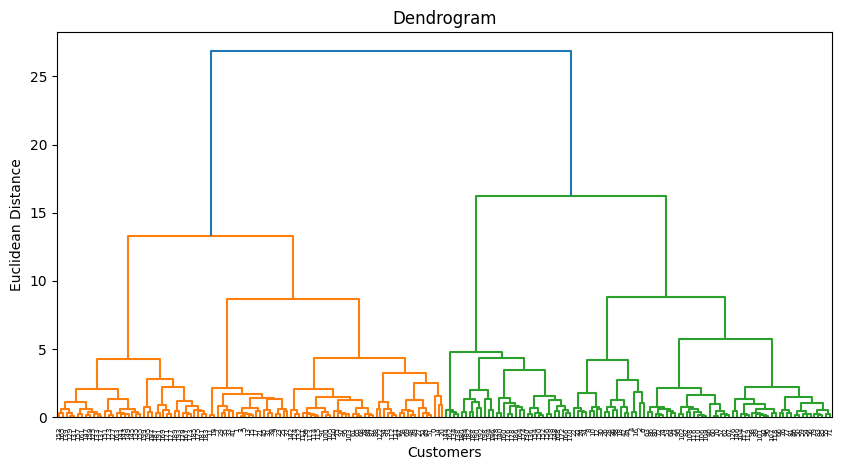

In [30]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [37]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(
    n_clusters=4,
    linkage='ward'
)

labels = agg.fit_predict(df_scaled)

In [38]:
from sklearn.metrics import silhouette_score

silhouette_score(df_scaled, labels)

np.float64(0.4521662003032379)

In [39]:
df_no_gender['Cluster'] = labels
df_no_gender.groupby('Cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,52.716418,46.671642,40.388060
1,26.147541,43.770492,58.967213
2,41.454545,89.090909,16.181818
3,32.692308,86.538462,82.128205
